<a href="https://colab.research.google.com/github/remjw/data/blob/master/files-basics-tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

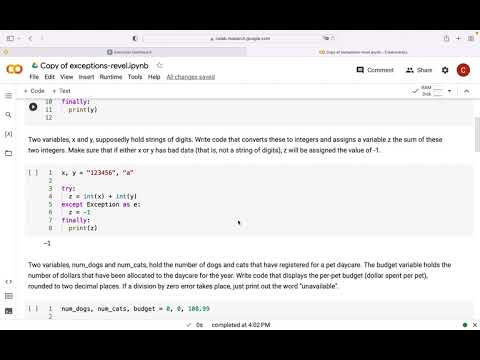

In [14]:
#@title
from IPython.display import YouTubeVideo
display(YouTubeVideo("Ypkew6UiiXI"))

# 1. Unknown Number of Lines? First-try 



In [ ]:
# get scores.txt
!wget https://raw.githubusercontent.com/remjw/data/master/py_programming_data/scores.txt

In [ ]:
# way 1: Without using WITH statement & Walrus operator
f = open('scores.txt', 'r')
running_sum = 0

value = f.readline()
while value != '':
  print(f'__read {value}')
  running_sum += float(value)
  value = f.readline()

print(f'{running_sum:.5f}')
f.close()


__read 80

__read 78.9

__read 88.5

__read 92

__read 67

406.40000


# 2. Using WITH statement & Walrus operator

In [ ]:
# use with statement & walrus operator

with open('scores.txt', 'r') as f:
  running_sum = 0
  while (value := f.readline()) != '':
    print(f'__read {value}')
    running_sum += float(value)
  # end-while
  print(f'{running_sum:.5f}')
# end-with

__read 80

__read 78.9

__read 88.5

__read 92

__read 67

406.40000


In [ ]:
# use with statement, walrus operator, String.strip

with open('scores.txt', 'r') as f:
  running_sum = 0
  while (value := f.readline().strip()) != '':
    print(f'__read {value}')
    running_sum += float(value)
  print(f'{running_sum:.5f}')

__read 80
__read 78.9
__read 88.5
__read 92
__read 67
406.40000


# 3. Read & Write in one WITH statement

In [ ]:
with open('scores.txt', 'r') as infile, open('output.txt', 'w') as outfile:
  running_sum = 0
  while (value := infile.readline().strip()) != '':
    print(f'__read {value}')
    running_sum += float(value)
  # end-while
  print(f'{running_sum:.5f}')
  # write
  outfile.write(f'{running_sum:.5f}')


__read 80
__read 78.9
__read 88.5
__read 92
__read 67
406.40000


# 4. Revel **Copy from File A to File B**

A file named data1.txt contains an unknown number of lines, each consisting of a single integer. Write some code that creates a file named data2.txt and copies all the lines of data1.txt to data2.txt.

In [ ]:
# create data1.txt
with open('data1.txt', 'w') as f:
  for i in range(9):
    f.write(f'{i}\n')

In [ ]:
# Do:
fa, fb = 'data1.txt', 'data2.txt'
with open(fa, 'r') as infile, open(fb, 'w') as outfile:
  while ( line := infile.readline() ) != '':
    outfile.write(f'{line}')

In [ ]:
# alternative

fa, fb = 'data1.txt', 'data2.txt'
with open(fa, 'r') as infile, open(fb, 'w') as outfile:
    outfile.write(infile.read())

# 5. Revel **categorize numbers**

A file named `data.txt` contains an unknown number of lines, each consisting of a single integer.

Write a program that creates the following three files:
- dataplus.txt
- dataminus.txt
- zeros.txt

The program should read each line of the `data.txt` file and perform the following:

1. If the line contains a positive number, that number should be written to the `dataplus.txt` file.
2. If the line contains a negative number, that number should be written to the `dataminus.txt` file.
3. If the line contains the value 0, do not write the value to a file. Instead, keep a count of the number of times 0 is read from the `data.txt` file.
4. After all the lines have been read from the data.txt file, the program should write the `count of zeros to the zeros.txt` file.

In [ ]:
# create a sample for data.txt
import random
numbers = [2,3,0,-2,-3,0,0] #random.sample(range(-10, 11), k=20)

with open('data.txt', 'w') as f:
  for x in numbers:
    f.write(f'{x}\n')

In [ ]:
f, fplus, fminus, fzero = "data.txt", "dataplus.txt", "dataminus.txt", "zeros.txt"

with open(f, 'r') as f0, open(fplus, 'w') as f1, open(fminus, 'w') as f2, open(fzero, 'w') as f3:
  zeros = 0
  while ( line := f0.readline() ) != '':
    x = int(line) 
    if x == 0:
      zeros += 1
    elif x > 0: 
      f1.write(f'{x}\n')
    else: 
      f2.write(f'{x}\n')
  # end-while
  f3.write(f'{zeros}')



# 4. Keyboard Input & Write to File

In [ ]:
# Rewrite Ch6 write_sales.py

# block 1: read days from keyboard
while True:
  try:
    days = int(input("How many days? "))
    print(days)
    break
  except Exception as e:
    print(f'{e.__class__.__name__}')

# block 2 data entry: write from keyboard to file
with open('output.txt', 'w') as outfile:
  for day in range(days):
    next = float(input(f"Enter the sales for day {day}"))
    outfile.write(f'{next}\n')

# block 3 verify output
with open('output.txt', 'r') as f:
  print(f.read())

How many days? 2
2
Enter the sales for day 012.4
Enter the sales for day 15.6
12.4
5.6



# ( 5. Modularize? )


In [ ]:
def repeat_until(do=input, prompt="Enter a number: ", convert=int):
  while True:
    try:
      return convert(do(prompt))
    except KeyboardInterrupt:
      # In colab: press STOP button to the left of cell.
      print("CTRL-C was pressed. Quit now...")
      return None
    except Exception as e:
      print(f'{e.__class__.__name__}')

# test fun
#repeat_until(prompt="How many days? ")

# test fun
repeat_until(prompt="Enter the sales for day ", convert=float)


Enter the sales for day 
ValueError
Enter the sales for day a
ValueError
Enter the sales for day 12.3


12.3

In [ ]:
# block 1
days = repeat_until(prompt="How many days? ")
# block 2
with open('output.txt', 'w') as outfile:
  for day in range(days):
    next = repeat_until(prompt=f'Enter the sales for day {day} ', convert=float)
    outfile.write(f'{next}\n')
# block 3
with open('output.txt', 'r') as f:
  print(f.read())

How many days? 1
Enter the sales for day 0 34
34.0

